In [35]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
# cifar10 to grayscale
# mnist, cifar 2차원 맞춰주기
#cnn binary classification
#mnist data label이 아니면 cifar로 분

# MNIST 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("MNIST: ",x_train.shape,y_train.shape,x_test.shape,y_test.shape)
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) #원핫 코드로 변환
x_train=x_train.reshape(60000,784) #텐서 모양 변환
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) #원핫 코드 변환
y_test=tf.keras.utils.to_categorical(y_test,10)
print("MNIST: ",x_train.shape,y_train.shape,x_test.shape,y_test.shape)

#CIFAR-10 읽고 텐서 모양 출력
(cifar_x_train,cifar_y_train), (cifar_x_test,cifar_y_test)=keras.datasets.cifar10.load_data()
print("CIFAR-10:", cifar_x_train.shape,cifar_y_train.shape,cifar_x_test.shape, cifar_y_test.shape)


MNIST:  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
MNIST:  (60000, 784) (60000, 10) (10000, 784) (10000, 10)
CIFAR-10: (50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Text(0.5, 1.0, 'Class distribution in training set')

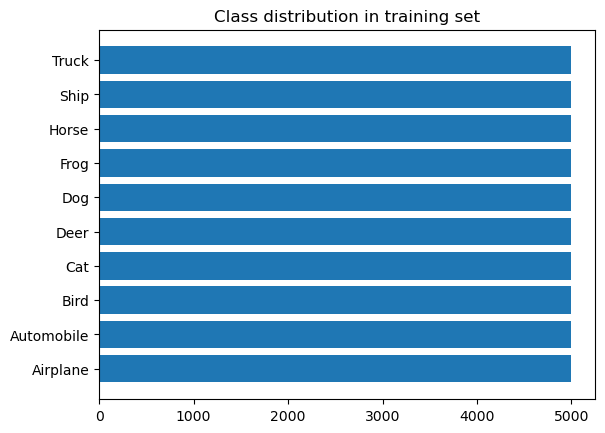

In [36]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(cifar_y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

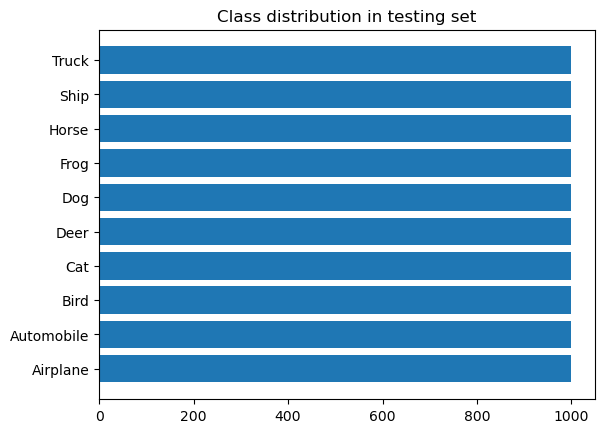

In [37]:
classes, counts = np.unique(cifar_y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [ ]:
classes, counts = np.unique(cifar_x_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(cifar_x_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

In [38]:
cifar_x_train=cifar_x_train.astype(np.float32)/255.0
cifar_x_test=cifar_x_test.astype(np.float32)/255.0
cifar_y_train=tf.keras.utils.to_categorical(cifar_y_train,10) #원핫 코드 변환
cifar_y_test=tf.keras.utils.to_categorical(cifar_y_test,10)
print("CIFAR-10:", cifar_x_train.shape,cifar_y_train.shape,cifar_x_test.shape, cifar_y_test.shape)

CIFAR-10: (50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


---
### Cifar10 rgb to grayscale

In [39]:
import cv2
import matplotlib.pyplot as plt

def gamma_decompress(value, gamma=2.2):
    return value ** gamma

def gamma_compress(value, gamma=2.2):
    return value ** (1/gamma)

def rgb_to_grayscale_gamma_corrected(img, gamma=2.2):
    b, g, r = cv2.split(img)  
    # 감마 확장을 적용하여 감마 압축된 RGB 값을 선형 공간으로 변환
    r_linear = gamma_decompress(r/255.0, gamma)
    g_linear = gamma_decompress(g/255.0, gamma)
    b_linear = gamma_decompress(b/255.0, gamma)
    
    # 선형 RGB 값을 사용하여 선형 밝기 값을 계산
    y_linear = 0.2126 * r_linear + 0.7152 * g_linear + 0.0722 * b_linear
    
    # 필요한 경우 선형 밝기 값을 다시 감마 압축하여 그레이스케일 값으로 변환
    y_nonlinear = gamma_compress(y_linear, gamma)
    
    # 0-255 스케일로 변환
    return np.rint(y_nonlinear * 255)

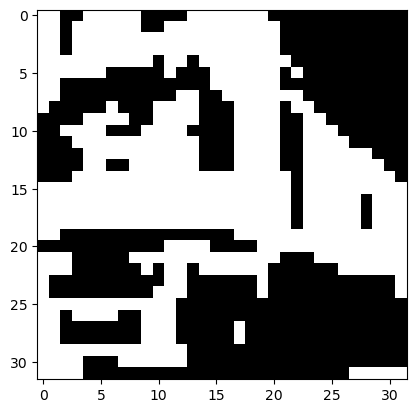

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


In [40]:
im=cifar_x_train[1]

gray = rgb_to_grayscale_gamma_corrected(im)
plt.imshow(gray, cmap='gray')
plt.show()
print(gray)

In [41]:
# CIFAR-10 데이터셋을 흑백으로 변환
def convert_to_grayscale(data):
    grayscale_data = []
    for img in data:
        grayscale_img = rgb_to_grayscale_gamma_corrected(img)
        grayscale_data.append(grayscale_img)
    return np.array(grayscale_data)

# 학습 및 테스트 데이터에 대해 흑백 변환 적용
cifar_x_train_gray = convert_to_grayscale(cifar_x_train)
cifar_x_test_gray = convert_to_grayscale(cifar_x_test)

In [42]:
# 변환된 데이터 확인
print("CIFAR-10 (Grayscale):", cifar_x_train_gray.shape, cifar_x_test_gray.shape)

CIFAR-10 (Grayscale): (50000, 32, 32) (10000, 32, 32)


## Mnist, Cifar10 차원 맞추기

In [43]:
def get_numpy_from_nonfixed_2d_array(aa, fixed_length, padding_value=0):
    rows = []
    for a in aa:
        rows.append(np.pad(a, (0, fixed_length), 'constant', constant_values=padding_value)[:fixed_length])
    return np.concatenate(rows, axis=0).reshape(-1, fixed_length)

In [44]:
print("padding 전 x_train:",x_train.shape)
x_train=get_numpy_from_nonfixed_2d_array(x_train, fixed_length=3072, padding_value=0)
print("X_train shape:",x_train.shape)

print("padding 전 x_test:",x_test.shape)
x_test=get_numpy_from_nonfixed_2d_array(x_train, fixed_length=3072, padding_value=0)
print("x_test shape:",x_test.shape)

padding 전 x_train: (60000, 784)
X_train shape: (60000, 3072)
padding 전 x_test: (10000, 784)
x_test shape: (60000, 3072)


In [45]:
# CNN에 맞추기 위해 4D로 변환
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

# CIFAR-10 레이블을 원핫 인코딩으로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("MNist:", x_train.shape, y_train.shape)

MNist: (180000, 32, 32, 1) (60000, 10, 10)


In [46]:
# CNN에 맞추기 위해 4D로 변환
cifar_x_train_gray = cifar_x_train_gray.reshape(-1, 32, 32, 1)
cifar_x_test_gray = cifar_x_test_gray.reshape(-1, 32, 32, 1)

# CIFAR-10 레이블을 원핫 인코딩으로 변환
cifar_y_train = tf.keras.utils.to_categorical(cifar_y_train, 10)
cifar_y_test = tf.keras.utils.to_categorical(cifar_y_test, 10)

print("CIFAR-10", cifar_x_train.shape, cifar_y_train.shape)

CIFAR-10 (50000, 32, 32, 3) (50000, 10, 10)


In [47]:
#모양 체크 
print("MNist:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("CIFAR-10: ",cifar_x_train_gray.shape, cifar_y_train.shape, cifar_x_test_gray.shape, cifar_y_test.shape)

MNist: (180000, 32, 32, 1) (60000, 10, 10) (180000, 32, 32, 1) (10000, 10, 10)
CIFAR-10:  (50000, 32, 32, 1) (50000, 10, 10) (10000, 32, 32, 1) (10000, 10, 10)


In [48]:
x_train_data=np.concatenate([x_train, cifar_x_train_gray])
x_test_data=np.concatenate([x_test, cifar_x_test_gray])
y_train_data=np.concatenate([y_train, cifar_y_train])
y_test_data=np.concatenate([y_test, cifar_y_test])

#print(f"x_train_data : {x_train_data.shape} x_test_data:{x_test_data.shape} ")
print(f"x_train_data : {x_train_data.shape} x_test_data:{x_test_data.shape} y_train_data: {y_train_data.shape} y_test_data: {y_test_data.shape} ")

x_train_data : (230000, 32, 32, 1) x_test_data:(190000, 32, 32, 1) y_train_data: (110000, 10, 10) y_test_data: (20000, 10, 10) 


---
## CNN Model 구성

In [49]:
import tensorflow as tf

x_train_data=tf.stack(x_train_data)
y_train_data=tf.stack(y_train_data)
#data_list = tf.stack(data_list)
#y = tf.stack(y)

In [50]:
y_train_data = tf.reshape(y_train_data, (-1, 10))
y_test_data = tf.reshape(y_test_data, (-1, 10))


x_train_data = x_train_data[:110000]
y_train_data = y_train_data[:110000]  

print(f"x_train_data : {x_train_data.shape} x_test_data:{x_test_data.shape} y_train_data: {y_train_data.shape} y_test_data: {y_test_data.shape} ")

x_train_data : (110000, 32, 32, 1) x_test_data:(190000, 32, 32, 1) y_train_data: (110000, 10) y_test_data: (200000, 10) 


In [51]:
y_test_data=y_test_data[:190000]
print(f"x_train_data : {x_train_data.shape} x_test_data:{x_test_data.shape} y_train_data: {y_train_data.shape} y_test_data: {y_test_data.shape} ")

x_train_data : (110000, 32, 32, 1) x_test_data:(190000, 32, 32, 1) y_train_data: (110000, 10) y_test_data: (190000, 10) 


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
import numpy as np


# 2. Model 구성
model = Sequential()
model.add(Conv2D(padding="same",filters=32, kernel_size=(4, 4), input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Multi-class classification

# 3. Compile the model
model.compile(loss='categorical_crossentropy',  
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 4. Train the model
history=model.fit(np.array(x_train_data), np.array(y_train_data), verbose=2, epochs=100, batch_size=128)


/raid/coss35/anaconda3/envs/project/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


I0000 00:00:1728328140.400973  662681 service.cc:146] XLA service 0x7feb400190c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728328140.401011  662681 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1728328140.401017  662681 service.cc:154]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2024-10-08 04:09:00.427426: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-08 04:09:00.536856: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90300
2024-10-08 04:09:10.565562: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_512', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1728328158.673372  662681 device_c

860/860 - 36s - 42ms/step - accuracy: 0.8995 - loss: 0.3389
Epoch 2/100
860/860 - 9s - 11ms/step - accuracy: 0.9000 - loss: 0.3283
Epoch 3/100
860/860 - 5s - 6ms/step - accuracy: 0.9000 - loss: 0.3277
Epoch 4/100
860/860 - 3s - 4ms/step - accuracy: 0.9000 - loss: 0.3262
Epoch 5/100
860/860 - 5s - 6ms/step - accuracy: 0.9000 - loss: 0.3253
Epoch 6/100
860/860 - 5s - 6ms/step - accuracy: 0.9000 - loss: 0.3247
Epoch 7/100
860/860 - 5s - 6ms/step - accuracy: 0.9000 - loss: 0.3223
Epoch 8/100
860/860 - 3s - 4ms/step - accuracy: 0.9003 - loss: 0.3178
Epoch 9/100
860/860 - 5s - 6ms/step - accuracy: 0.9018 - loss: 0.3103
Epoch 10/100
860/860 - 5s - 6ms/step - accuracy: 0.9048 - loss: 0.2984
Epoch 11/100
860/860 - 5s - 6ms/step - accuracy: 0.9098 - loss: 0.2838
Epoch 12/100
860/860 - 3s - 4ms/step - accuracy: 0.9142 - loss: 0.2697
Epoch 13/100
860/860 - 3s - 4ms/step - accuracy: 0.9188 - loss: 0.2575
Epoch 14/100
860/860 - 3s - 4ms/step - accuracy: 0.9223 - loss: 0.2488
Epoch 15/100
860/860 - 5

In [16]:
res=model.evaluate(x_test_data,y_test_data, verbose = 2)
print("정확률은", res[1]*100)

5938/5938 - 15s - 2ms/step - accuracy: 0.8761 - loss: 2.1703
정확률은 87.60789632797241


In [28]:
model.save("CNN_1008.keras")

In [ ]:
from keras.models import load_model

load_model=load_model("CNN_1008.h5")
load_model.summary()

In [ ]:
preds=load_model.predict(x_train[0])
print(preds)

In [ ]:
# CIFAR-10 클래스 이름
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for i in range(10):
    temp=str(i)
    classes_name.append(temp)

#print(classes_name)

dic={}

for i in range(len(classes_name)):
    dic.setdefault(classes_name[i],0)
#print(dic)
# Fix the shape of the input by adding a batch dimension and converting to 3 channels (RGB)

for i in range(len(x_test_data)):
    input_data = np.expand_dims(x_test_data[i], axis=0)  # Add batch dimension
    input_data = np.repeat(input_data, 3, axis=-1)  # Repeat the grayscale channel to create an RGB-like input
    
    # 예측 수행
    preds = model.predict(input_data)
    
    # 예측된 클래스의 인덱스를 구합니다.
    predicted_class = np.argmax(preds)
    dic[classes_name[predicted_class]]+=1

print(dic)
'''
input_data = np.expand_dims(x_test_data[121231], axis=0)  # Add batch dimension
input_data = np.repeat(input_data, 3, axis=-1)  # Repeat the grayscale channel to create an RGB-like input

# 예측 수행
preds = model.predict(input_data)

# 예측된 클래스의 인덱스를 구합니다.
predicted_class = np.argmax(preds)

#print(f"Predicted class: {classes_name[predicted_class]}")
'''


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [ ]:
# Map predictions to class labels
class_labels = {0: 'mnist', 1: 'cifar-10'}  # Update with your class labels {'cats': 0, 'dogs': 1}
predicted_class = class_labels[class_indices[0]]

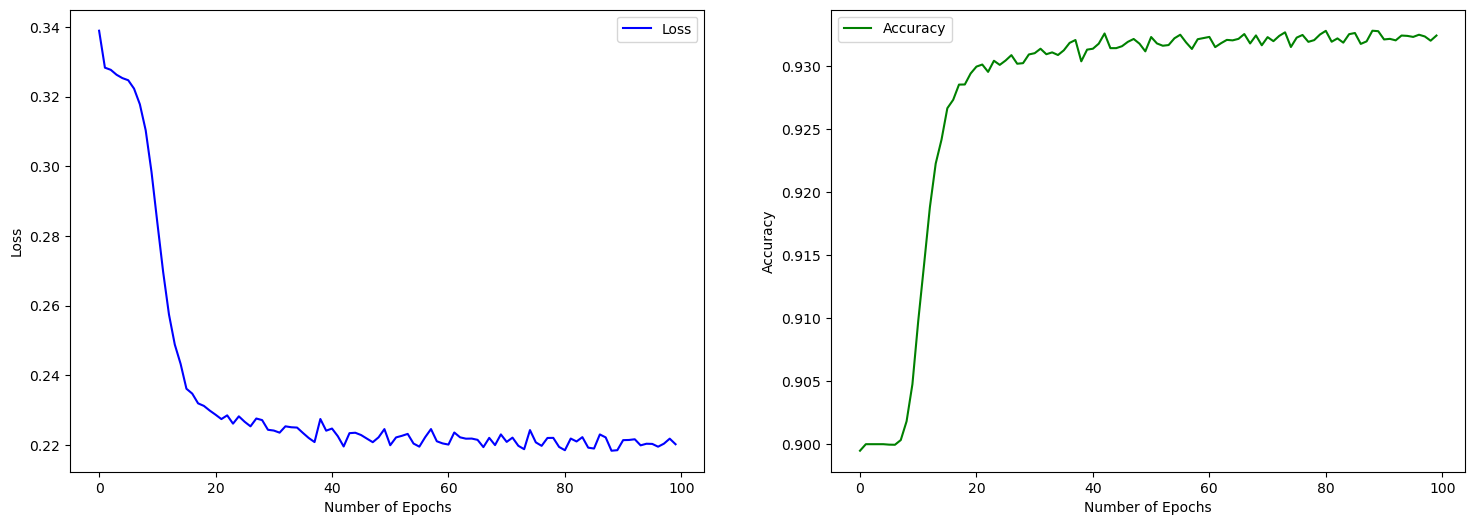

In [72]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="blue", label="Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="green", label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()

plt.show()
